In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [89]:
etf_all = pd.read_csv('stats_100_etfs.csv')
etf_all.head()

,date,open,high,low,close,volume,ticker,Clf_Target,1day_change,2day_change,3day_change,4day_change,5day_change,ewma7,ewma50,ewma200,MACD,RSI
0,2015-01-29,200.38,202.30,198.68,201.99,173585424,SPY,0.0,-1.85,0.75,3.46,2.98,4.11,202.607510,202.813380,202.823244,-0.051351,49.664254
1,2015-01-30,200.57,202.17,199.13,199.45,197729724,SPY,1.0,2.54,0.69,3.29,6.00,5.52,201.812154,202.546072,202.608549,-0.250332,44.689405
2,2015-02-02,200.05,202.03,197.86,201.92,163106969,SPY,1.0,-2.47,0.07,-1.78,0.82,3.53,201.839268,202.498240,202.566959,-0.243913,49.940725
3,2015-02-03,203.00,204.85,202.55,204.84,124212881,SPY,0.0,-2.92,-5.39,-2.85,-4.70,-2.10,202.592637,202.670737,202.697663,-0.048698,55.339046
4,2015-02-04,203.92,205.38,203.51,204.06,134306728,SPY,1.0,0.78,-2.14,-4.61,-2.07,-3.92,202.960644,202.769663,202.772444,0.051507,53.673969


In [90]:
etf = etf_all.loc[etf_all['ticker'] == 'PYZ']

In [91]:
X = etf[['5day_change', 'ewma7', 'ewma50', 'ewma200']]
y = etf[['close']]
print(X.shape, y.shape)

(1239, 4) (1239, 1)


In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [93]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)


In [94]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [95]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9977092909468206
Testing Score: 0.9979998783554301


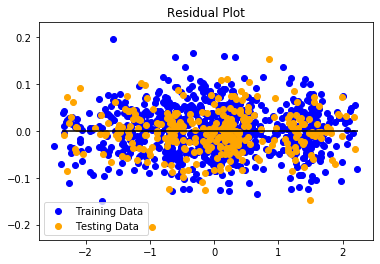

In [96]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [98]:
predictions = pd.DataFrame(predictions)
actual = pd.DataFrame(y_test_scaled)
# dataset = pd.DataFrame({'predictions': predictions, 'actual': actual}, columns=['Predictions', 'Actuals'])
pred_ytest = pd.merge(predictions, actual, left_index=True, right_index=True)
pred_ytest
# pd.DataFrame({"Predicted": predictions, "Actual":actual, "Error": predictions - actual})

,0_x,0_y
0,-0.295457,-0.271463
1,-2.230634,-2.259591
2,-1.006618,-0.964492
3,0.613576,0.578942
4,-0.604882,-0.639635
...,...,...
305,0.191918,0.181894
306,1.486144,1.632924
307,-0.391441,-0.366754
308,1.516755,1.520307


In [75]:
pd.DataFrame(predictions)
# y_test_scaled.shape

,0
0,-0.295457
1,-2.230634
2,-1.006618
3,0.613576
4,-0.604882
...,...
305,0.191918
306,1.486144
307,-0.391441
308,1.516755


In [32]:
# new_data = np.array([[0.5, 0.5]])
# plt.scatter(X[:, 0], X[:, 1], c=y)
# plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)

In [34]:
# new_data = np.array([[0.5, 0.5]])
# predictions = model.predict(new_data)
# print("Classes are either 0 (orange) or 1 (blue)")
# print(f"The new point was classified as: {predictions}")

In [47]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9642168816438353, R2: 0.07268242927524282


In [48]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9643316506268238, R2: 0.07257205235016972


In [49]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9642168749212935, R2: 0.0726824357405218


In [26]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5326003169631558, R2: 0.4128704231763558


In [29]:
# #from 01-07

# fig1 = plt.figure(figsize=(12, 6))
# axes1 = fig1.add_subplot(1, 2, 1)
# axes2 = fig1.add_subplot(1, 2, 2)

# axes1.set_title("Original Data")
# axes2.set_title("Scaled Data")

# maxx = X_train["fund_sharpe_ratio_3years"].max()
# maxy = y_train.max()
# axes1.set_xlim(-maxx + 1, maxx + 1)
# axes1.set_ylim(-maxy + 1, maxy + 1)
# # line13: ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# axes2.set_xlim(-2, 2)
# axes2.set_ylim(-2, 2)

# def set_axes(ax):
#     ax.spines['left'].set_position('center')
#     ax.spines['right'].set_color('none')
#     ax.spines['bottom'].set_position('center')
#     ax.spines['top'].set_color('none')
#     ax.xaxis.set_ticks_position('bottom')
#     ax.yaxis.set_ticks_position('left')
    
# set_axes(axes1)
# set_axes(axes2)

# axes1.scatter(X_train["fund_sharpe_ratio_3years"], y_train)
# axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [33]:
# From 2-03
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(etf.data, etf.target)

AttributeError: 'DataFrame' object has no attribute 'data'